In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

from pathlib import Path
from tqdm import tqdm
import cv2
import os

import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
from database.roi_extraction import *
from database.utils import load_coords

In [2]:
thispath = Path('__file__').resolve()
base_path = thispath.parent.parent / "data" / "INbreast Release 1.0"
csvs_path = base_path
png_folder = base_path/'AllPNGs'
masks_folder = base_path/'AllMasks'
dcm_folder = base_path/'AllDICOMs'
xml_folder = base_path/'AllXML'

In [3]:
image_filanme = "20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
image_metadata = {'img_id': image_filanme.split('_')[0],
                  'case_id': image_filanme.split('_')[1],
                  'side': image_filanme.split('_')[3],
                  'view': image_filanme.split('_')[4]}
dcm_filename = dcm_folder/image_filanme

roi_df = pd.read_csv(csvs_path/"rois_metadata.csv",
                     index_col=0)

# Usage of slicing

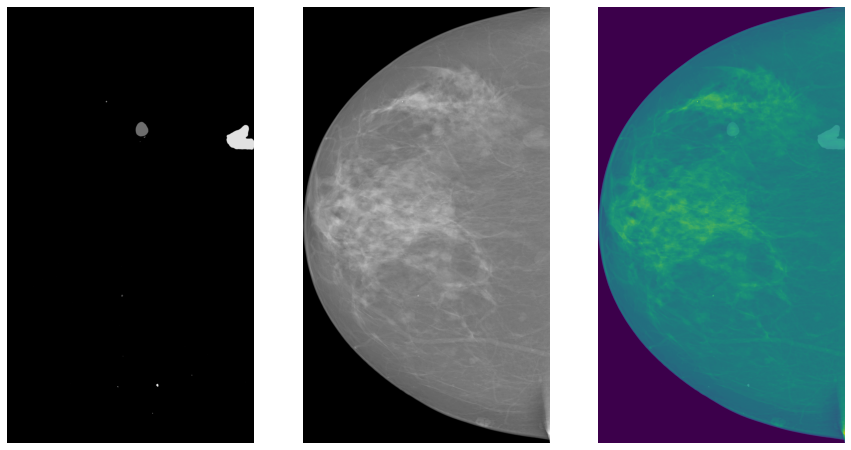

In [4]:
def simple_im_show(img, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def simple_im_show2(img, mask, figsize=(15, 10)):
    fig, ax = plt.subplots(1,3, figsize=figsize)
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(mask, cmap='gray')
    ax[2].imshow(img, cmap='gray')
    ax[2].imshow(mask, alpha=0.9)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    plt.show()

mask = cv2.imread(str(
    masks_folder/f'{image_metadata["img_id"]}_lesion_mask.png'), cv2.IMREAD_GRAYSCALE)
png = cv2.imread(
    str(png_folder/f'{image_metadata["img_id"]}.png'), cv2.IMREAD_ANYDEPTH)

simple_im_show2(mask, png)


This would be the general way to extract ROIs

In [10]:
w = 256
s = 256

image_slices, mask_slices, slices_description = extract_ROIs(padd_image(png, w), padd_image(mask, w), roi_df, w, s, image_metadata['case_id'], int(image_metadata['img_id']))

The idea would be to develope quick filtration functions to select interesting for us ROIs. Examples below

In [11]:
def select_mC_ROIs(image_pathces, mask_patches, patched_df, min_breast_perc=0.5):
    return image_pathces[(patched_df.breast > min_breast_perc) & (patched_df.calcification > 0)],\
    mask_patches[(patched_df.breast > min_breast_perc)
                 & (patched_df.calcification > 0)]

def select_normal_ROIs(image_pathces, mask_patches, patched_df, min_breast_perc=0.5):
    return image_pathces[(patched_df.breast > min_breast_perc)
                 & (patched_df.normal == 1)],\
    mask_patches[(patched_df.breast > min_breast_perc)
                 & (patched_df.normal == 1)]


In [12]:
slices_description[(slices_description.breast > 0.5)
                 & (slices_description.calcification > 0)]

,calcification,mass,normal,asymmetry,cluster,distortion,breast,bbox
19,0.001389,0.00000,0.998611,0,0,0,1.000000,"((768, 512), (1024, 768))"
36,0.001358,0.00589,0.992752,0,0,0,1.000000,"((1024, 1024), (1280, 1280))"
49,0.000015,0.00000,0.999985,0,0,0,1.000000,"((256, 1536), (512, 1792))"
57,0.000015,0.00000,0.999985,0,0,0,1.000000,"((256, 1792), (512, 2048))"
64,0.000015,0.00000,0.999985,0,0,0,0.715164,"((0, 2048), (256, 2304))"
65,0.000031,0.00000,0.999969,0,0,0,1.000000,"((256, 2048), (512, 2304))"
67,0.002670,0.00000,0.997330,0,0,0,1.000000,"((768, 2048), (1024, 2304))"
69,0.000015,0.00000,0.999985,0,0,0,1.000000,"((1280, 2048), (1536, 2304))"
70,0.000015,0.00000,0.999985,0,0,0,1.000000,"((1536, 2048), (1792, 2304))"
73,0.000015,0.00000,0.999985,0,0,0,0.999054,"((256, 2304), (512, 2560))"


0


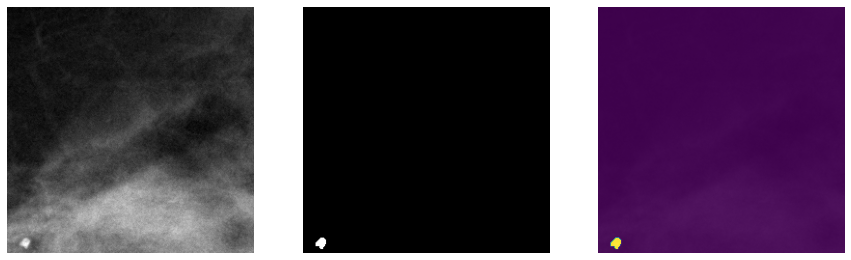

1


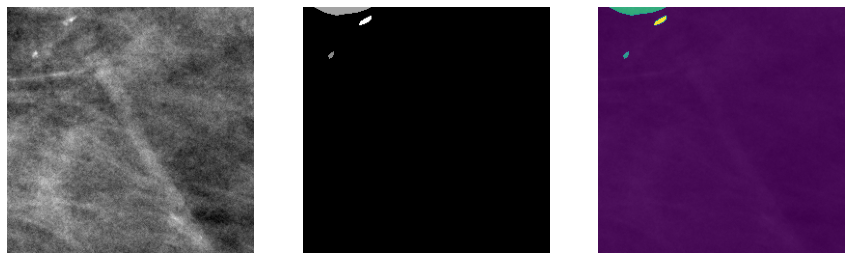

2


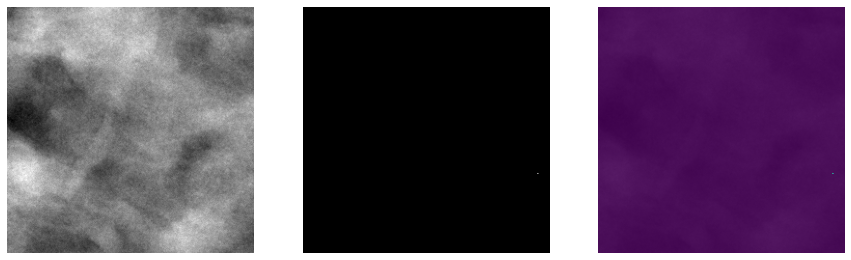

3


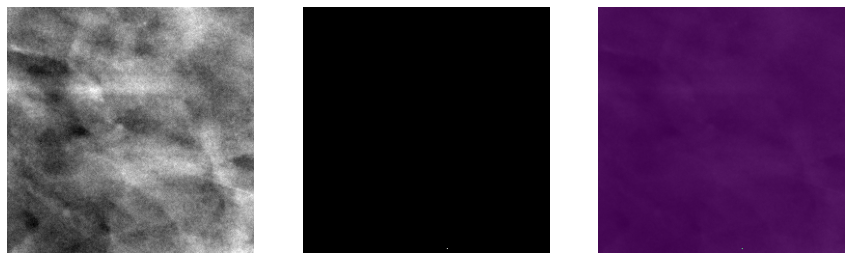

4


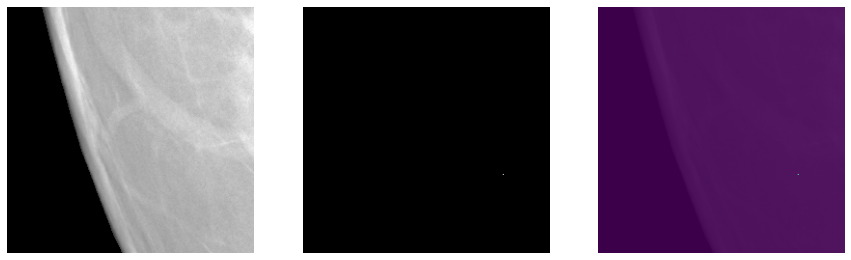

5


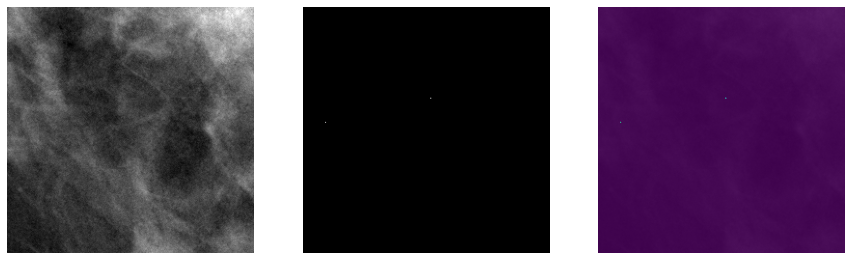

6


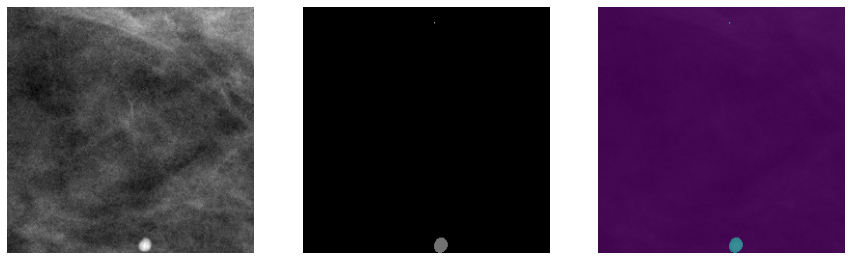

7


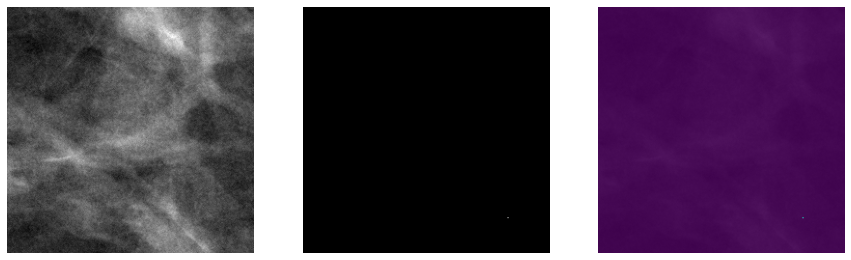

8


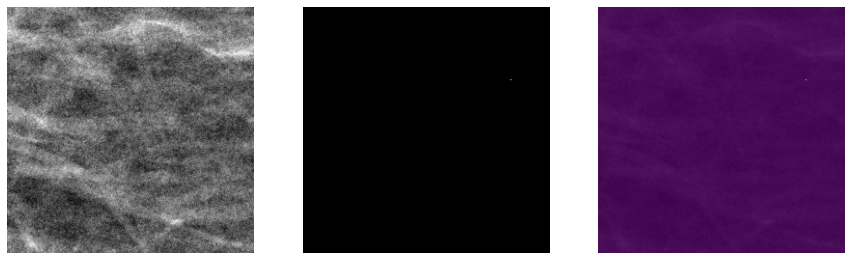

9


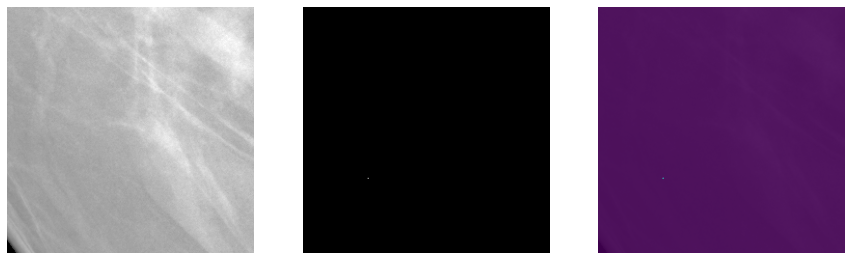

In [13]:
for ch in range(10):
    mC_img, mC_mask  = select_mC_ROIs(image_slices, mask_slices, slices_description)
    print(ch, )
    simple_im_show2(mC_img[ch], mC_mask[ch])